In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num

import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cities = pd.read_csv ("cities_r2.csv")

In [3]:
cities.head ()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
cities.info ()
# there is no null values anywhere in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [5]:
cities.describe ()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [6]:
print (cities.describe(include=['O']))
# from the below output, we can learn that there is two Aurangabad's. One is in Maharashtra 
# and one is in Bihar
# most of the cities are selected from Uttar Pradesh

       name_of_city     state_name               location
count           493            493                    493
unique          492             29                    490
top     Aurangabad   UTTAR PRADESH  22.6500518,88.3423199
freq              2             63                      2


## Plotting state wise cities to check which state have most number of cities in it 

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\2179260364.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


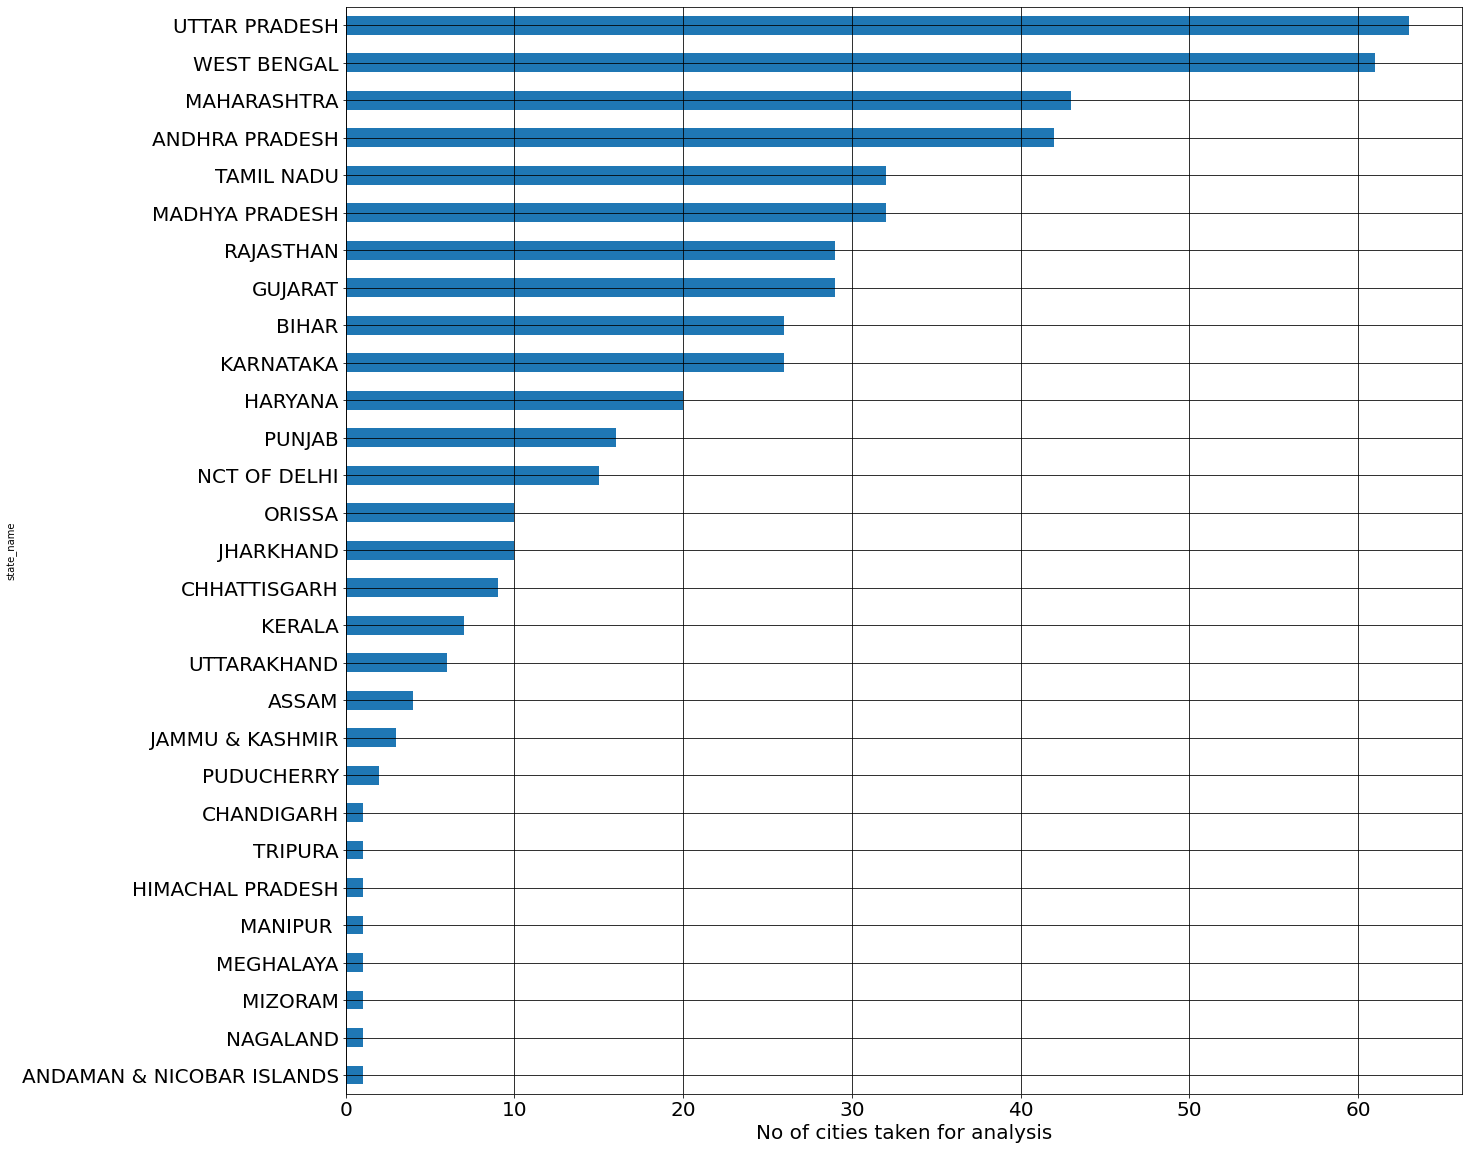

In [7]:
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()

## Top 10 populous cities

In [8]:
cities['latitude'] = cities['location'].apply(lambda x: x.split(',')[0])
cities['longitude'] = cities['location'].apply(lambda x: x.split(',')[1])
cities.head(1)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,30.1452928,74.1993043


In [9]:
# A table to show top 10 cities with most population
print("The Top 10 Cities sorted according to the Total Population (Descending Order)")
top_pop_cities = cities.sort_values(by='population_total',ascending=False)
top10_pop_cities=top_pop_cities.head(10)
top10_pop_cities

The Top 10 Cities sorted according to the Total Population (Descending Order)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407,19.0760,72.8777
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097,28.7041,77.1025
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800,12.9716,77.5946
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747,17.3850,78.4867
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591,23.022505,72.5713621
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267,13.0826802,80.2707184
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861,22.572646,88.363895
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229,21.1702401,72.8310607
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486,18.5204303,73.8567437
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041,26.9124336,75.7872709


Text(0.5, 1.0, 'Top 10 Populated Cities in India')

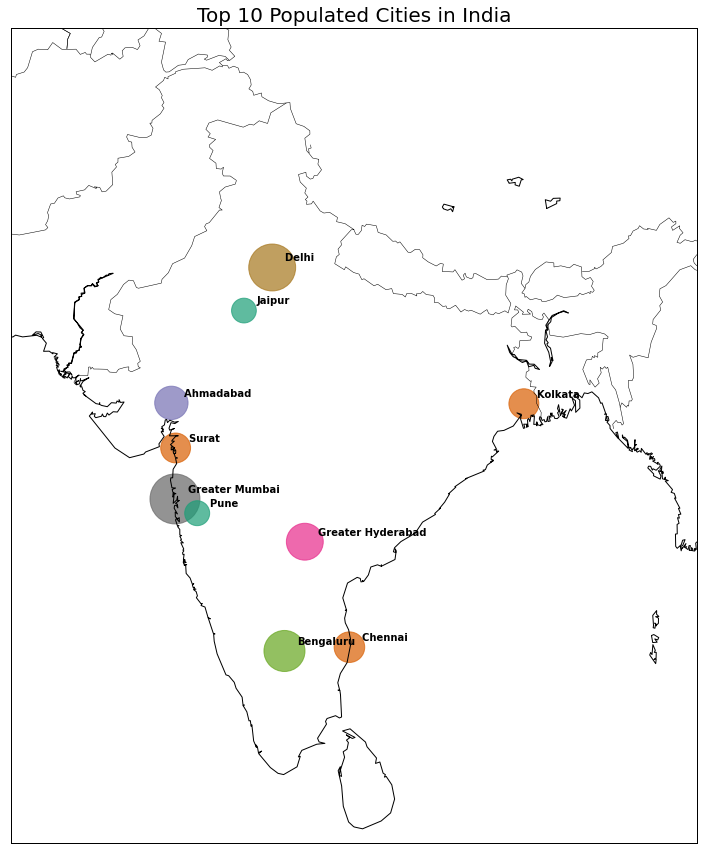

In [10]:
# Plotting these top 10 populous cities on India map. Circles are sized according to the 
# population of the respective city


plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(top10_pop_cities['longitude'])
lt=array(top10_pop_cities['latitude'])
pt=array(top10_pop_cities['population_total'])
nc=array(top10_pop_cities['name_of_city'])

x, y = map(lg, lt)
population_sizes = top10_pop_cities["population_total"].apply(lambda x: int(x / 5000))
plt.scatter(x, y, s=population_sizes, marker="o", c=population_sizes, cmap=cm.Dark2, alpha=0.7)


for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=10, fontweight='bold')

plt.title('Top 10 Populated Cities in India',fontsize=20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\521403432.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


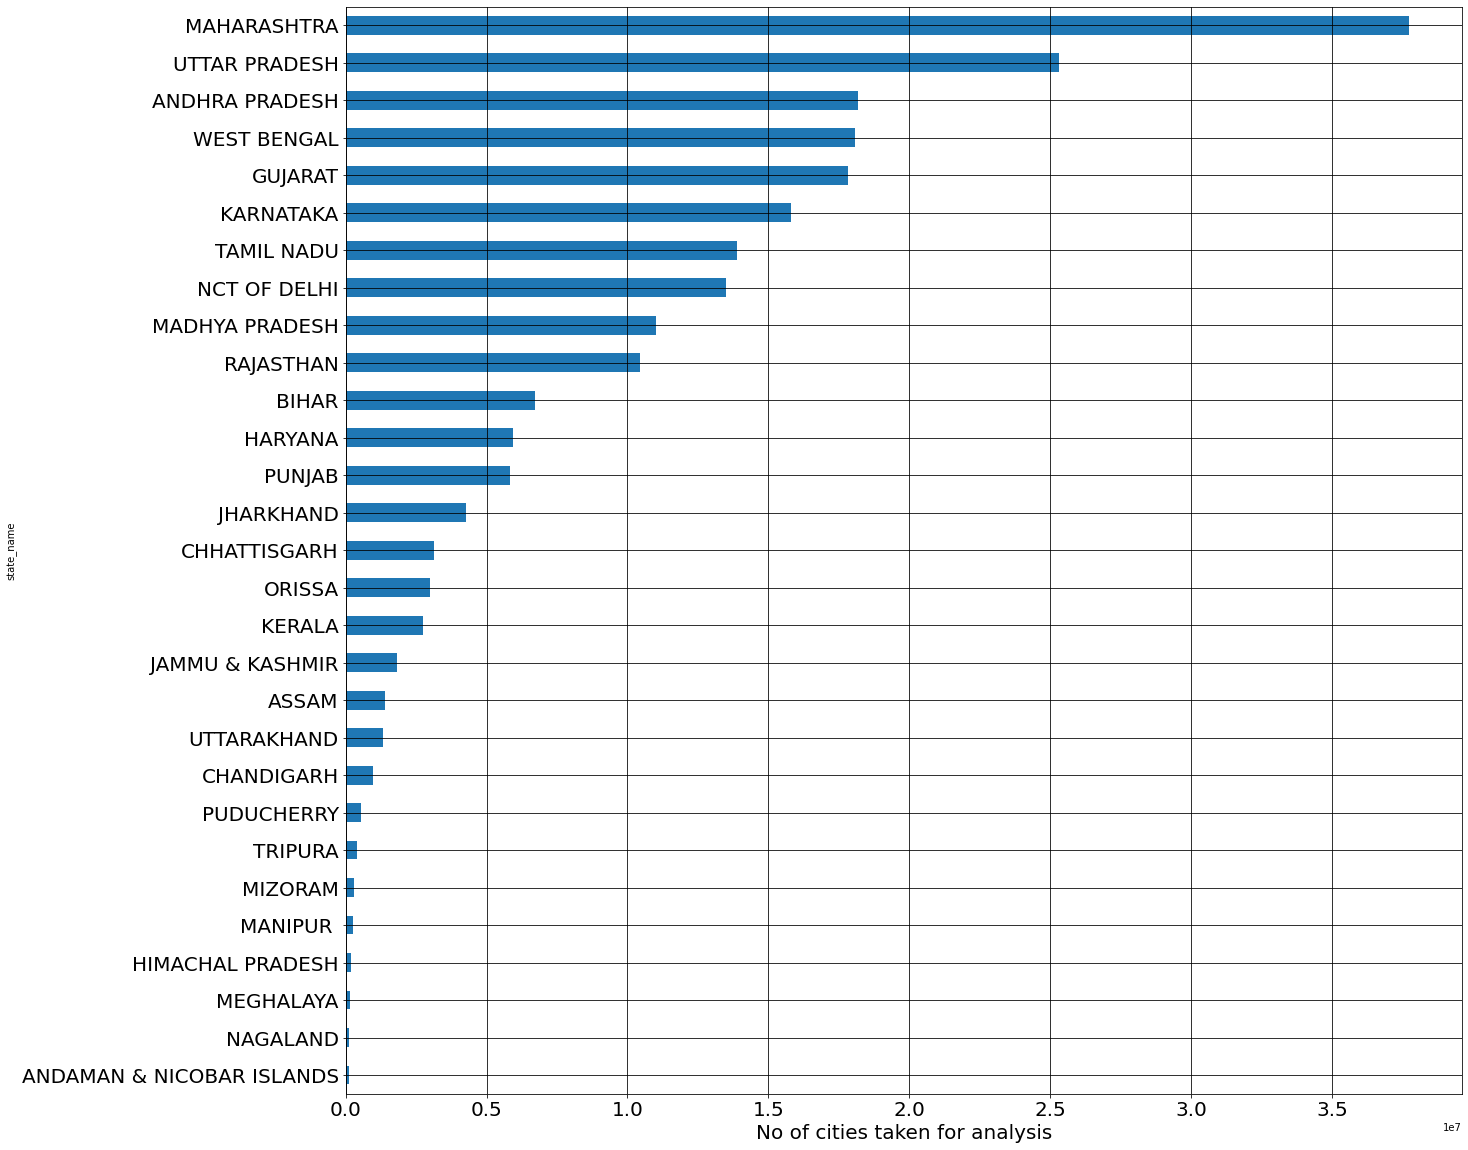

In [11]:
# A bar chart to show the population of the states
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['population_total'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()

In [13]:
def plot_map(sizes, colorbarValue):

    plt.figure(figsize=(19,20))
    f, ax = plt.subplots(figsize=(19, 20))

    # Setting up Basemap
    map = Basemap(width=5000000, height=3500000, resolution='l', projection='aea', llcrnrlon=69,
                  llcrnrlat=6, urcrnrlon=99, urcrnrlat=36, lon_0=78, lat_0=20, ax=ax)
                  
    # draw map boundaries
    map.drawmapboundary()
    map.drawcountries()
    map.drawcoastlines()

    x, y = map(array(cities["longitude"]), array(cities["latitude"]))
    cs = map.scatter(x, y, s=sizes, marker="o", c=sizes, cmap=cm.Dark2, alpha=0.5)

    # adding colorbar
    cbar = map.colorbar(cs, location='right',pad="5%")
    cbar.ax.set_yticklabels(colorbarValue)

    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\2587828021.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(colorbarValue)


<Figure size 1368x1440 with 0 Axes>

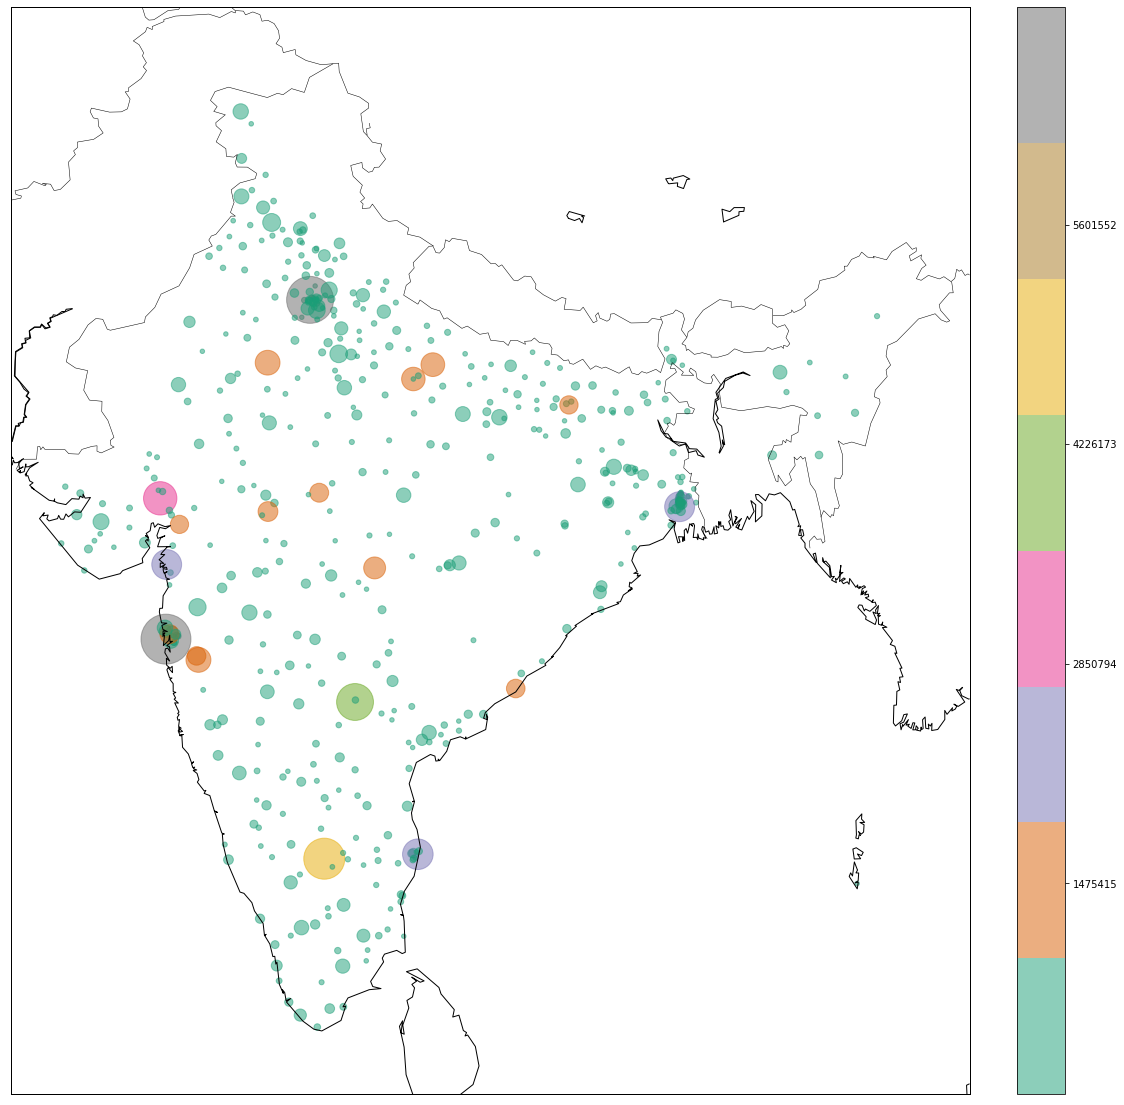

In [14]:
population_sizes = cities["population_total"].apply(lambda x: int(x / 5000))
colorbarValue = np.linspace(cities["population_total"].min(), cities["population_total"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(population_sizes, colorbarValue)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\2553637684.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


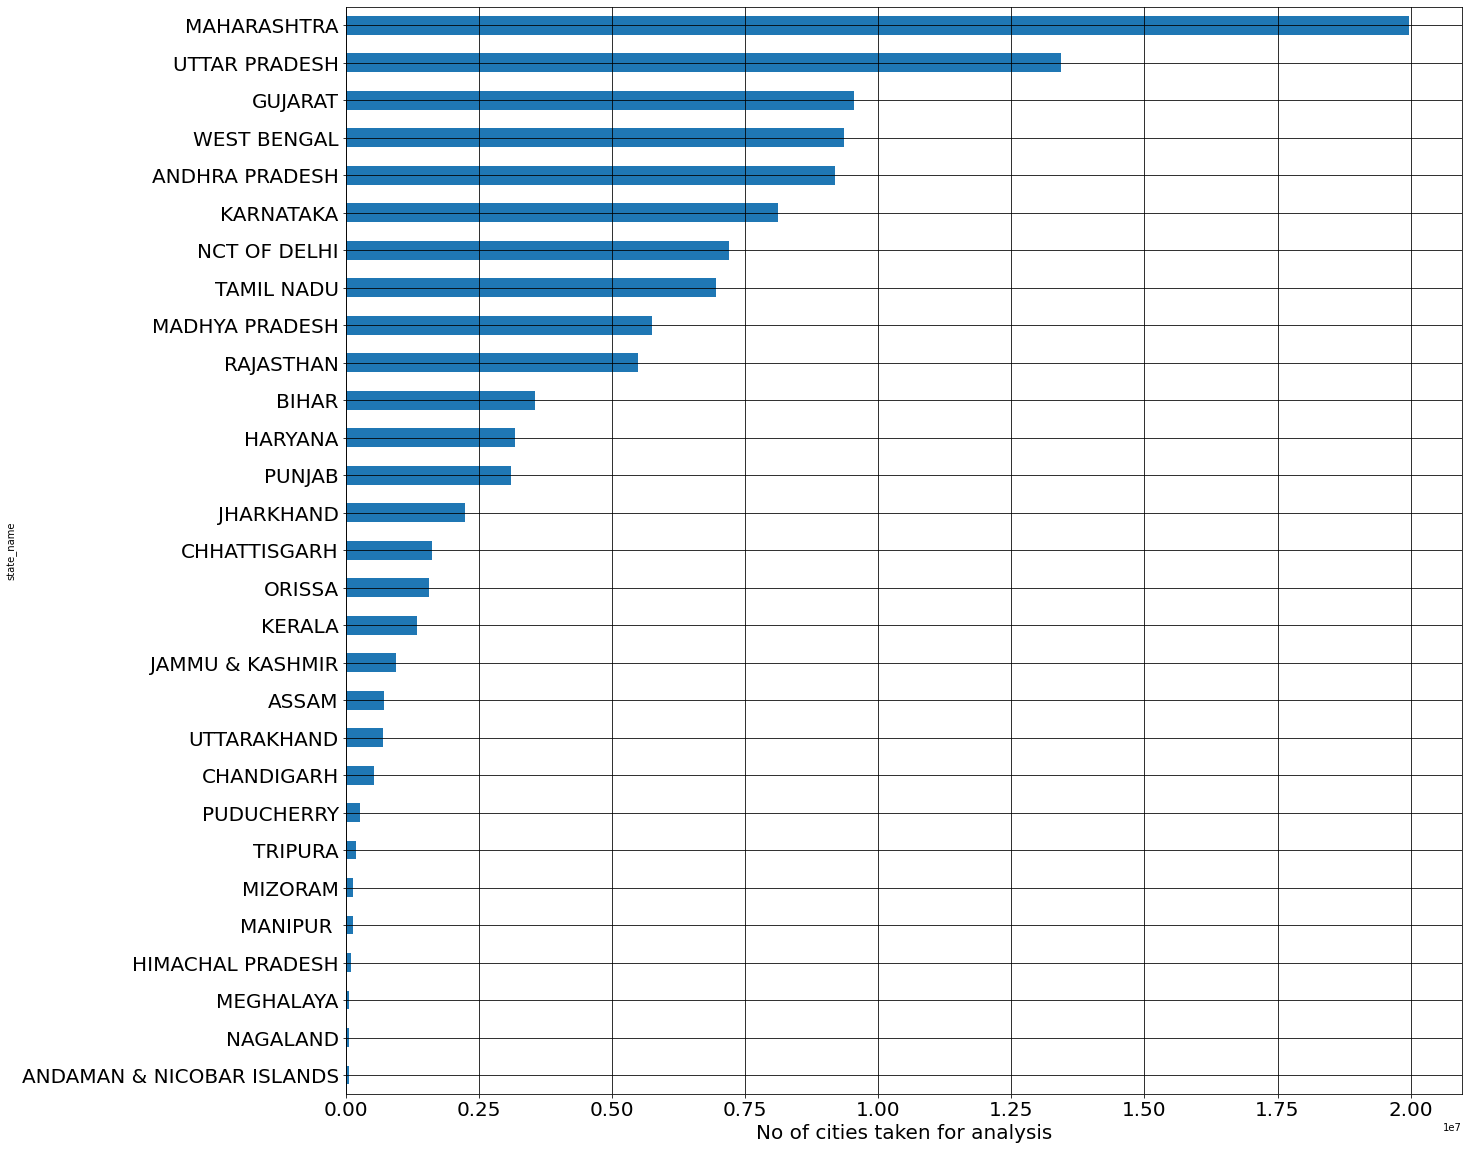

In [15]:
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['population_male'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\2587828021.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(colorbarValue)


<Figure size 1368x1440 with 0 Axes>

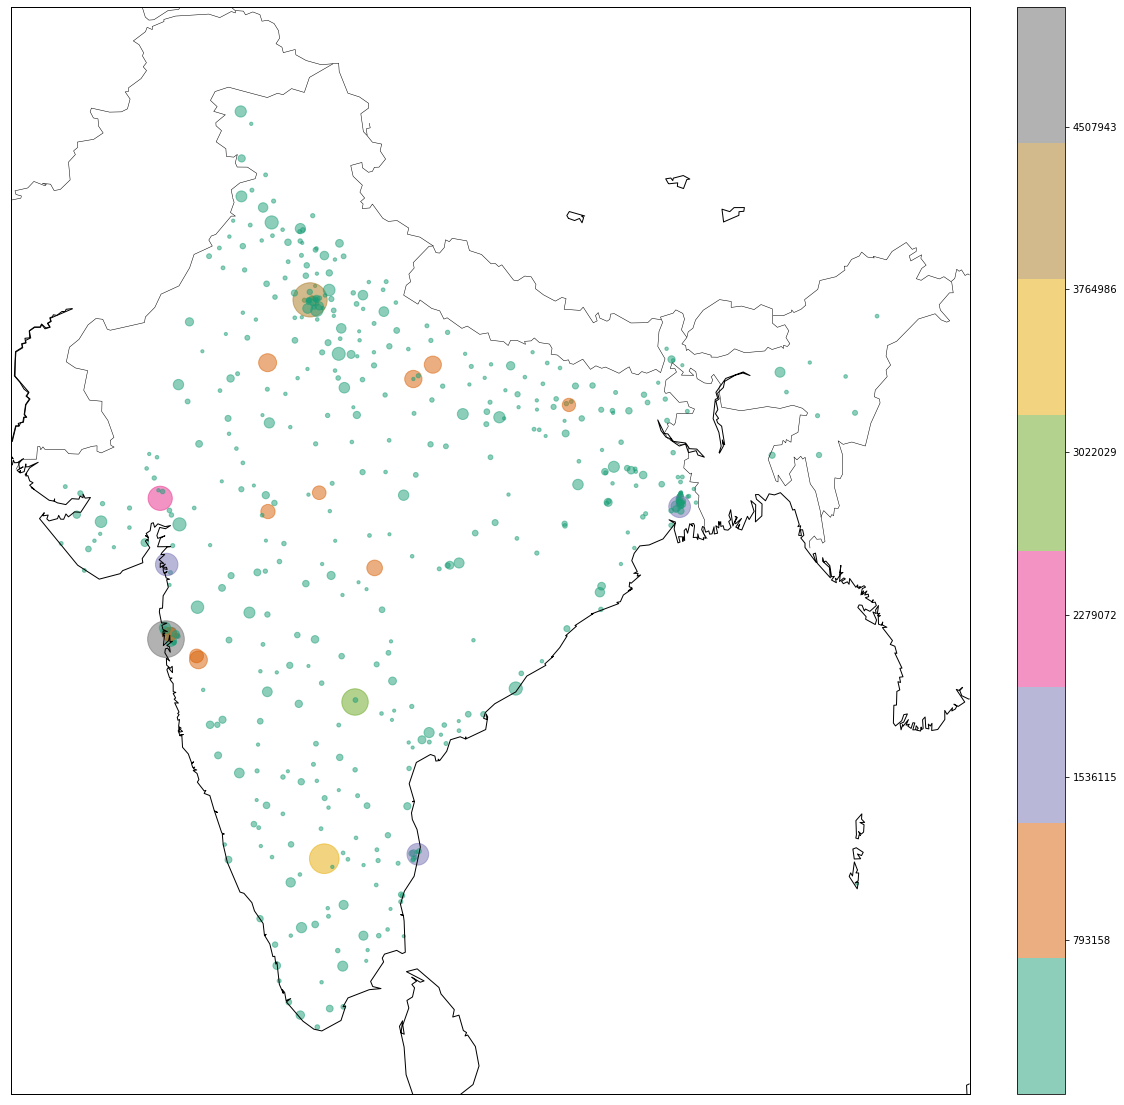

In [16]:
population_sizes = cities["population_male"].apply(lambda x: int(x / 5000))
colorbarValue = np.linspace(cities["population_male"].min(), cities["population_male"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(population_sizes, colorbarValue)

In [17]:
print("The Top 10 Cities sorted according to the Total Male Population (Descending Order)")
top_male_cities = cities.sort_values(by='population_male',ascending=False)
top10_male_pop_cities=top_male_cities.head(10)
top10_male_pop_cities

The Top 10 Cities sorted according to the Total Male Population (Descending Order)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407,19.0760,72.8777
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097,28.7041,77.1025
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800,12.9716,77.5946
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747,17.3850,78.4867
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591,23.022505,72.5713621
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229,21.1702401,72.8310607
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861,22.572646,88.363895
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267,13.0826802,80.2707184
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041,26.9124336,75.7872709
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486,18.5204303,73.8567437


Text(0.5, 1.0, 'Top 10 Male Populated Cities in India')

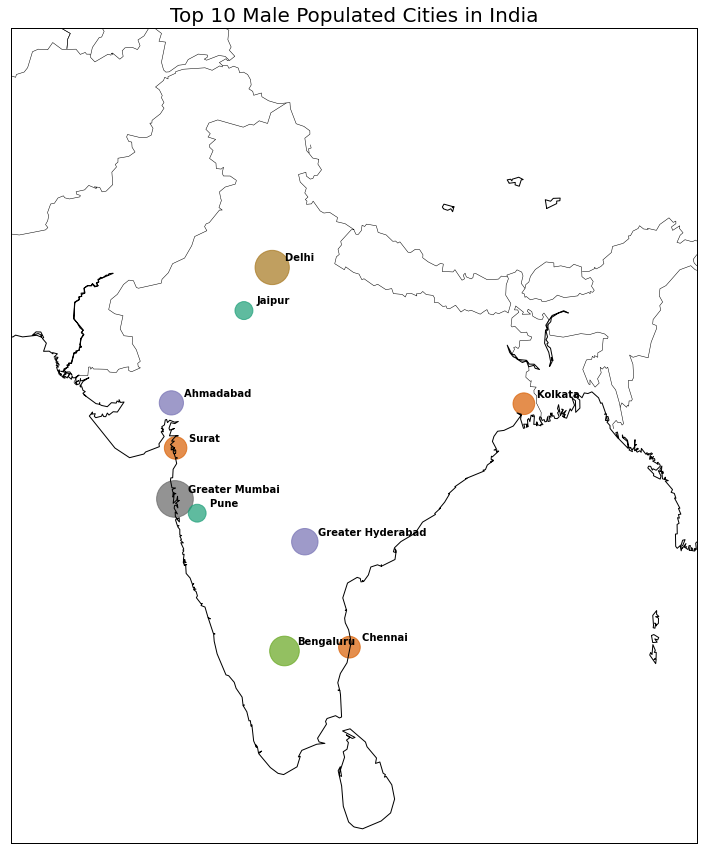

In [18]:
plt.subplots(figsize=(20, 15))
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawmapboundary ()
map.drawcountries ()
map.drawcoastlines ()

lg=array(top10_male_pop_cities['longitude'])
lt=array(top10_male_pop_cities['latitude'])
pt=array(top10_male_pop_cities['population_male'])
nc=array(top10_male_pop_cities['name_of_city'])

x, y = map(lg, lt)
population_sizes_male = top10_male_pop_cities["population_male"].apply(lambda x: int(x / 5000))
plt.scatter(x, y, s=population_sizes_male, marker="o", c=population_sizes_male, cmap=cm.Dark2, alpha=0.7)
for ncs, xpt, ypt in zip(nc, x, y):
    plt.text(xpt+60000, ypt+30000, ncs, fontsize=10, fontweight='bold')

plt.title('Top 10 Male Populated Cities in India',fontsize=20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\475490318.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


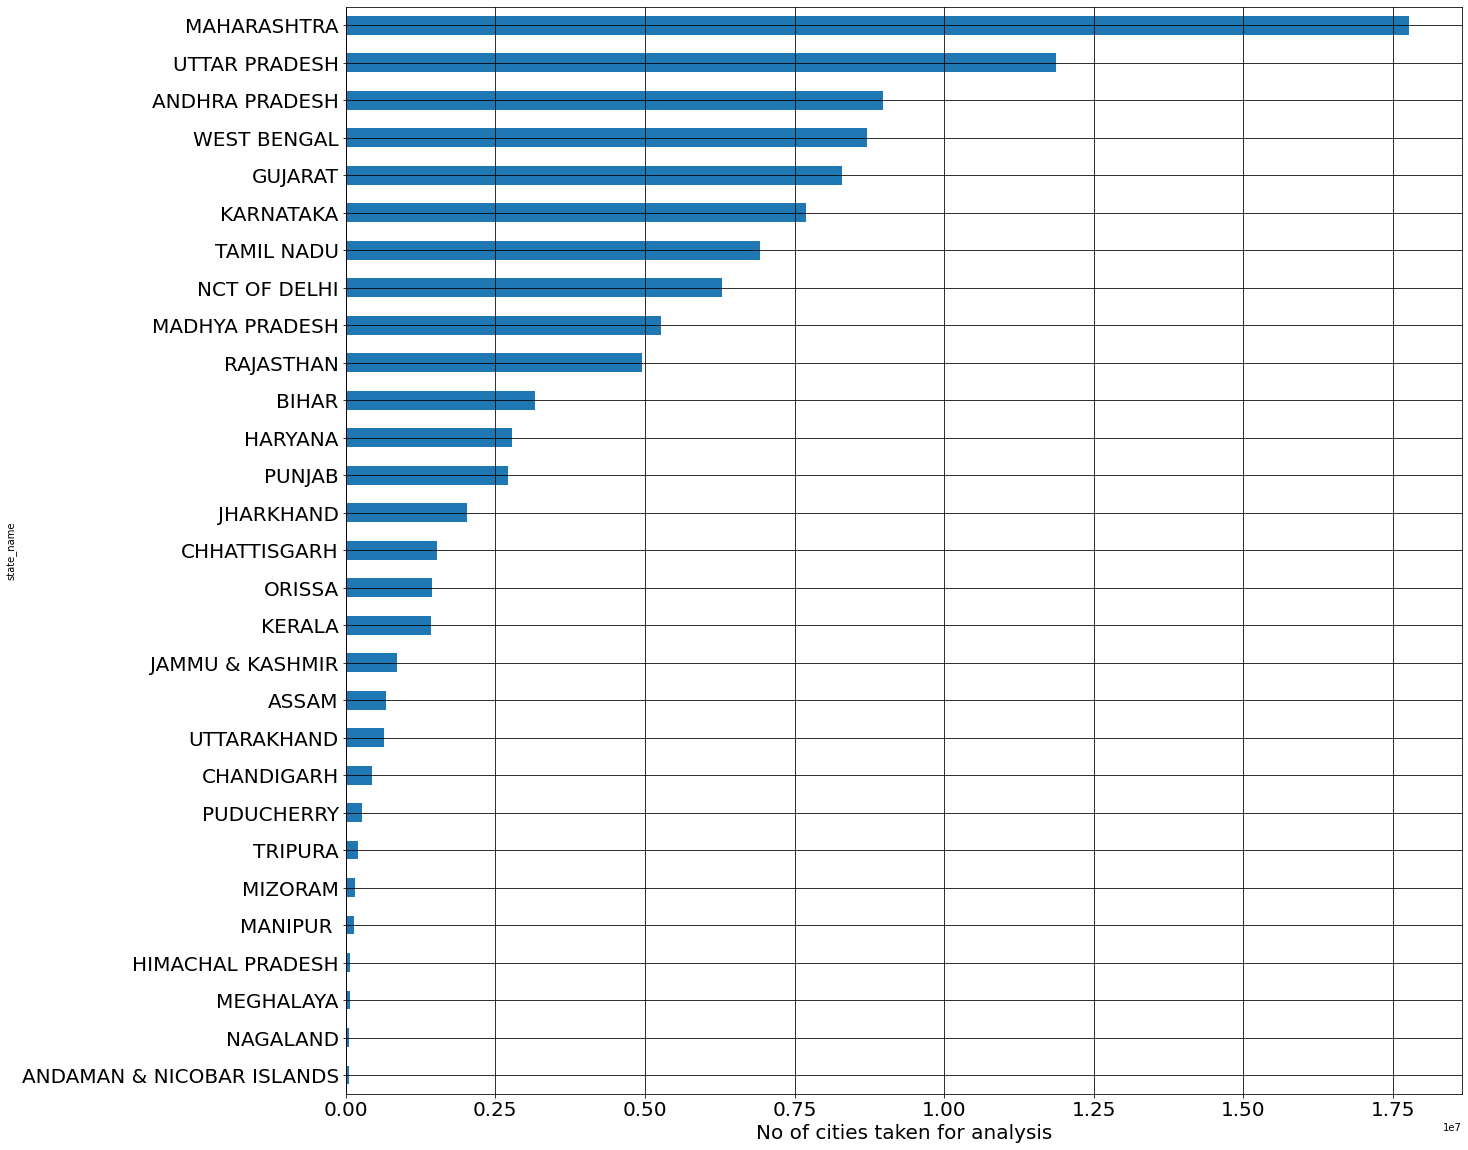

In [19]:
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['population_female'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of cities taken for analysis', fontsize = 20)
plt.show ()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\2587828021.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(colorbarValue)


<Figure size 1368x1440 with 0 Axes>

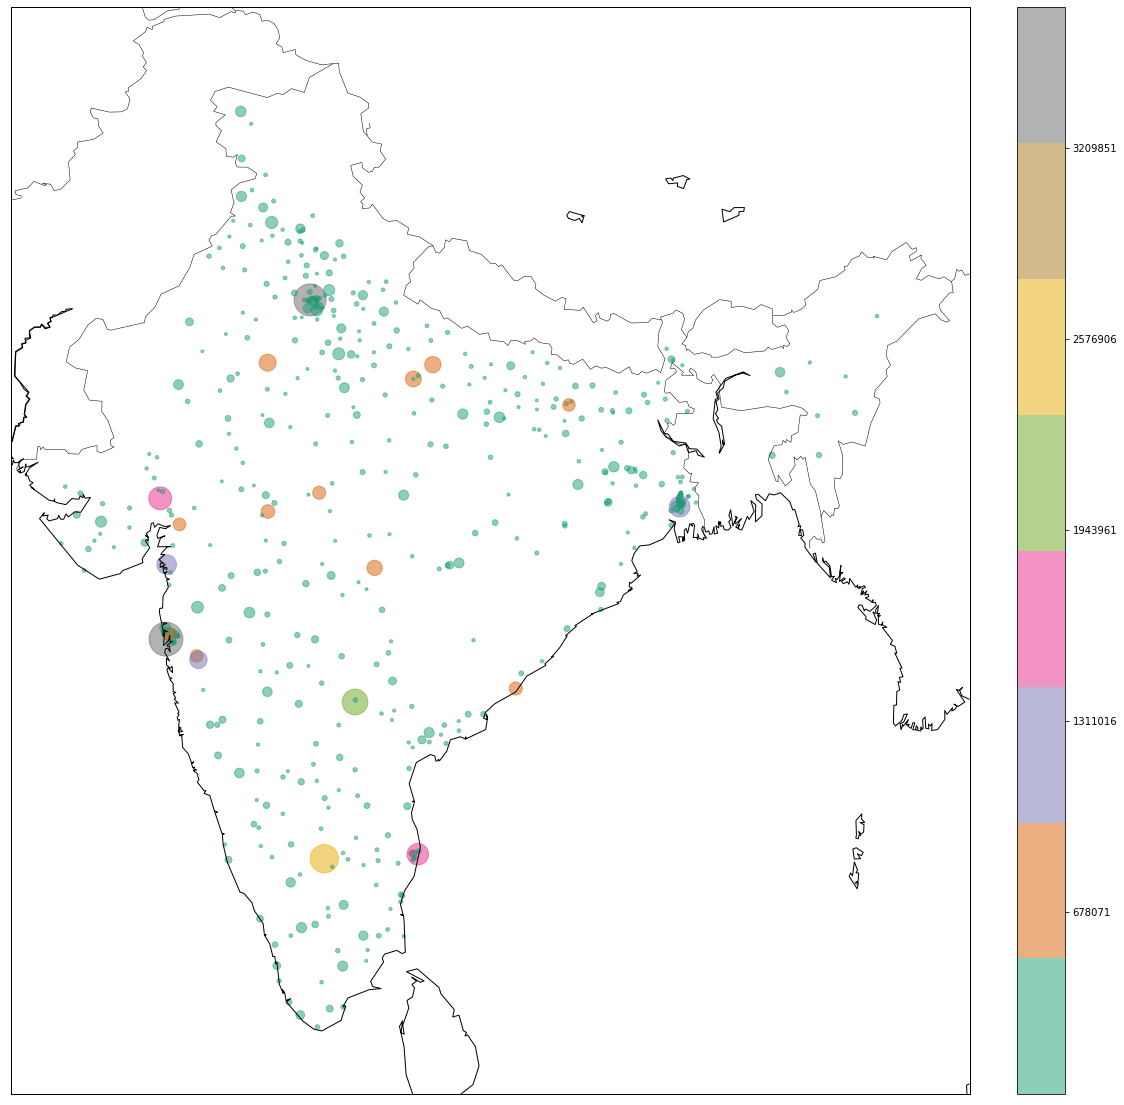

In [20]:
population_sizes = cities["population_female"].apply(lambda x: int(x / 5000))
colorbarValue = np.linspace(cities["population_female"].min(), cities["population_female"].max(), 
                            num=10)
colorbarValue = colorbarValue.astype(int)

plot_map(population_sizes, colorbarValue)

In [21]:
print("The Top 10 Cities sorted according to the Total Female Population (Descending Order)")
top_female_cities = cities.sort_values(by='population_female',ascending=False)
top10_female_pop_cities=top_female_cities.head(10)
top10_female_pop_cities

The Top 10 Cities sorted according to the Total Female Population (Descending Order)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,latitude,longitude
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407,19.0760,72.8777
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097,28.7041,77.1025
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800,12.9716,77.5946
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747,17.3850,78.4867
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591,23.022505,72.5713621
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267,13.0826802,80.2707184
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861,22.572646,88.363895
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229,21.1702401,72.8310607
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486,18.5204303,73.8567437
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041,26.9124336,75.7872709


C:\Users\Dell\AppData\Local\Temp\ipykernel_13016\794456826.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='Black',linestyle='-')


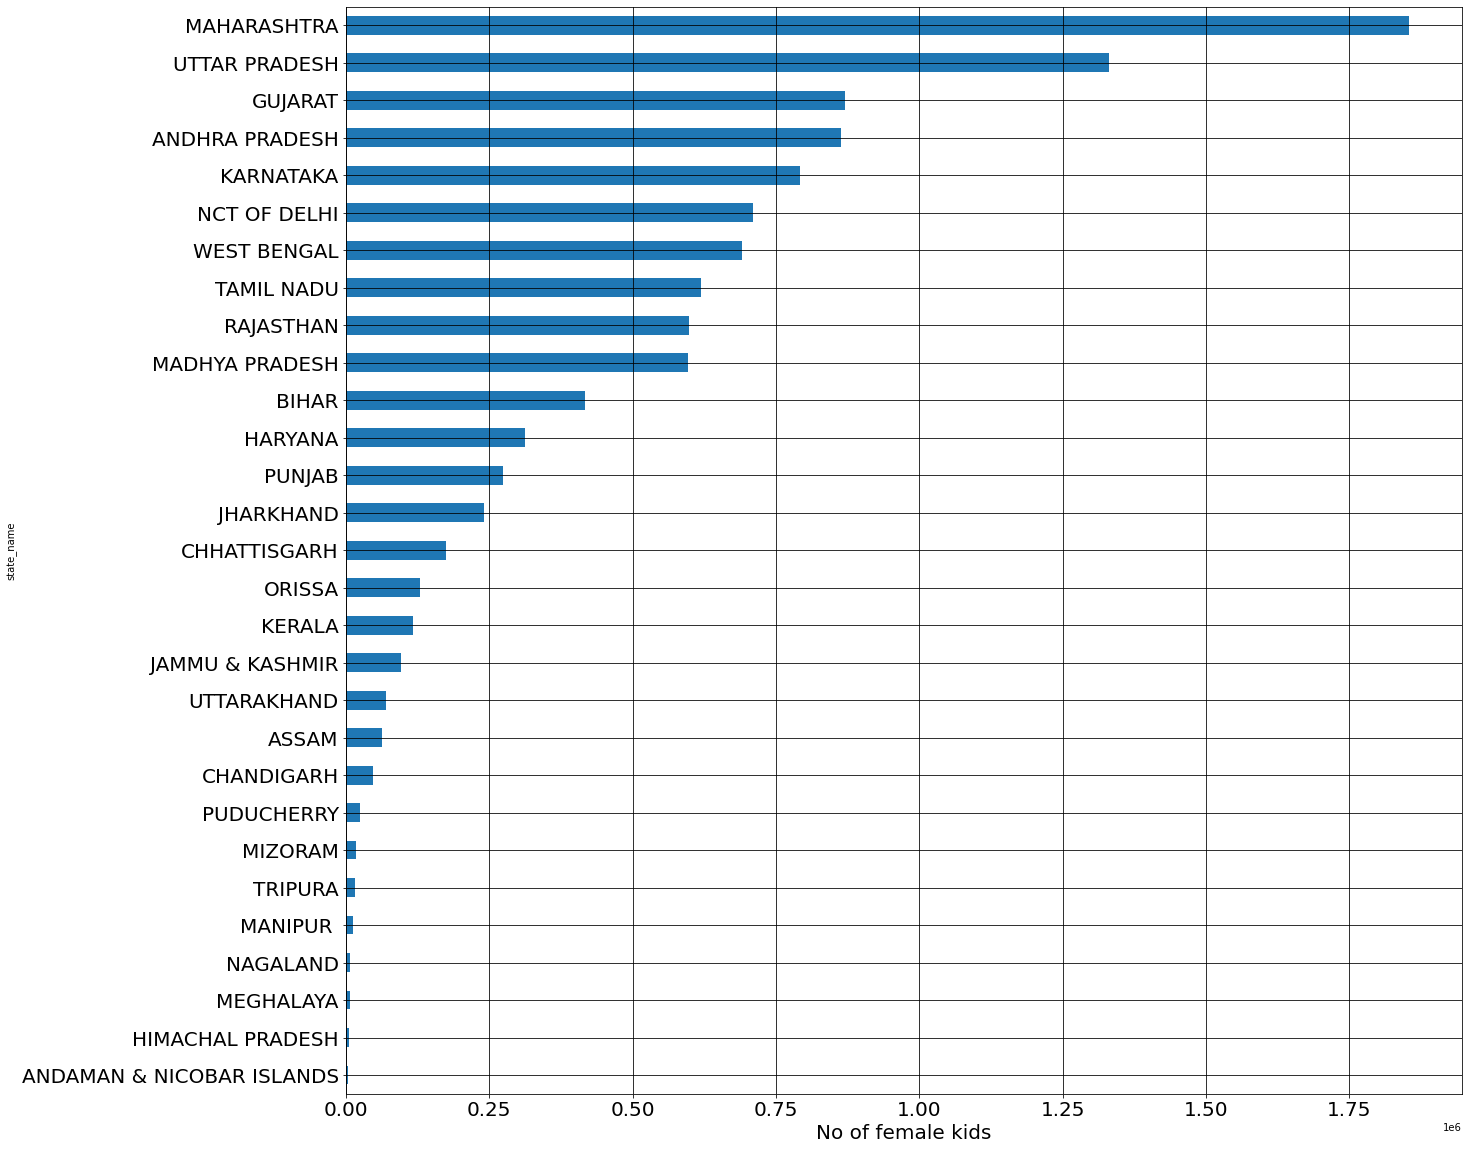

In [22]:
fig = plt.figure(figsize=(20,20))
states = cities.groupby('state_name')['0-6_population_female'].sum().sort_values(ascending=True)
states.plot(kind="barh", fontsize = 20)
plt.grid(b=True, which='both', color='Black',linestyle='-')
plt.xlabel('No of female kids', fontsize = 20)
plt.show ()
